In [1]:
import matplotlib.cm as cm
from IPython.display import SVG, display
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
from rdkit import Chem
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit import Geometry
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG=True
IPythonConsole.drawOptions.addAtomIndices = True
rdDepictor.SetPreferCoordGen(True)

In [2]:
data = pd.read_csv('../predictions/tg_pred.csv')

# 设置色图名称和颜色数量
cmap_name = 'seismic_r'
num_colors = 10

In [3]:
def sub_attribution_visualize(smiles, atom_attribution, bond_attribution, ring_attribution, atom_list=None, bond_list=None,
                              ring_list=None, cmap_name=cmap_name):
    mol = Chem.MolFromSmiles(smiles)
    cmap = cm.get_cmap(cmap_name, num_colors)
    norm = colors.Normalize(vmin=-50, vmax=50)
    plt_colors = cm.ScalarMappable(norm=norm, cmap=cmap)
    highlight_atom_colors = {}
    highlight_bond_colors = {}
    atomrads = {}
    widthmults = {}
    if atom_list is None:
        atom_list = range(0, mol.GetNumAtoms())
    if bond_list is None:
        bond_list = range(0, mol.GetNumBonds())
    for i in atom_list:
        highlight_atom_colors[i] = [plt_colors.to_rgba(float(atom_attribution[atom_list.index(i)]))]
        atomrads[atom_list.index(i)] = 0.2
    if len(bond_list) > 0:
        for i in bond_list:
            highlight_bond_colors[i] = [plt_colors.to_rgba(float(bond_attribution[bond_list.index(i)]))]
            widthmults[bond_list.index(i)] = 1
    if len(ring_list)>0:
        ring_color = [plt_colors.to_rgba(float(ring_attribution[i])) for i in range(len(ring_list))]
    rdDepictor.Compute2DCoords(mol)

    drawer = rdMolDraw2D.MolDraw2DCairo(400, 400)
    dos = drawer.drawOptions()
    dos.useBWAtomPalette()
#     drawer.SetFontSize(1)

    if len(ring_list)>0:
        # a hack to set the molecule scale
        drawer.DrawMoleculeWithHighlights(mol, smiles, highlight_atom_colors, highlight_bond_colors, atomrads, widthmults)
        drawer.ClearDrawing()
        conf = mol.GetConformer()
        for i in range(len(ring_list)):
            aring = ring_list[i]
            ring_colors_i = ring_color[i]
            ps = []
            for aidx in aring:
                pos = Geometry.Point2D(conf.GetAtomPosition(aidx))
                ps.append(pos)
            drawer.SetFillPolys(True)
            drawer.SetColour(ring_colors_i)
            drawer.DrawPolygon(ps)
        dos.clearBackground = False

    # now draw the molecule, with highlights:
    drawer.DrawMoleculeWithHighlights(mol, smiles, highlight_atom_colors, highlight_bond_colors, atomrads, widthmults)
    drawer.FinishDrawing()
    png = drawer.GetDrawingText()
    drawer.WriteDrawingText('../figures/mol_figure/{}.png'.format(smiles)) # 必要时改变这里的保存路径
    return png

Polymer 1

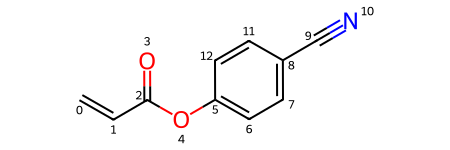

In [101]:
smi = 'C=CC(=O)Oc1ccc(C#N)cc1'
mol = Chem.MolFromSmiles(smi)
mol

In [102]:
data_sub = data[data['SMILES']==smi]

data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']

color = data_sub['diff'].values
color1 = -color[1]
color2 = -color[2]
color3 = -color[3]
print(color1, color2, color3)

-20.205845443763053 -15.59055872471697 26.464210831691673


C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\870846688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']


In [103]:
for bond in mol.GetBonds():
    print(bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 0 1
1 1 2
2 2 3
3 2 4
4 4 5
5 5 6
6 6 7
7 7 8
8 8 9
9 9 10
10 8 11
11 11 12
12 12 5


In [104]:
# 不要问这里为什么是硬编码，从子结构中反写原子和键列表实在是有点麻烦
atom_list = [5,6,7,8,11,12, 9,10, 0,1]
bond_list = [5,6,7,10,11,12, 9, 0]


atom_attribution = [color1, color1, color1, color1, color1, color1, color2, color2, color3, color3]
bond_attribution = [color1, color1, color1, color1, color1, color1, color2, color3]
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=CC(=O)Oc1ccc(C#N)cc1', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddy\\\x14\xf5\xff\x07\xf0\xd7\xec\t,\xa0\\\xde\x8a\'h\xa8\x80\xa0\x96\xa6x\x90W\x94\xb7vi\xe7W\xcb\n\xb5LM-\xd4\xb4/j}\x93\xca\xabo\x87\x9a\xfd2\xbf\x95\xf7Q\xa8)j\x1e\xa4\x81\xa2\x887\xa8\x08\xc8\xcd.\xcb\x9e\xf3\xfbc\xdcm\x05vYf\x97c\xe0\xfd|\xf0\xa8u\xe733\x9f\xd9e^|\xe63\x9f\x99aX\x96\x05!\x84\x08\x81\xa8\xae+@\x08!\xf6\xa2\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x

Polymer 2

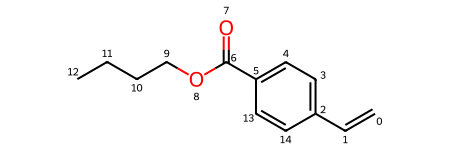

In [105]:
smi = 'C=Cc1ccc(C(=O)OCCCC)cc1'
mol = Chem.MolFromSmiles(smi)
mol

In [106]:
data_sub = data[data['SMILES']==smi]

data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']

color = data_sub['diff'].values
color1 = -color[1]
color2 = -color[2]
color3 = -color[3]
print(color1, color2, color3)

-30.61277672504474 5.947524995881224 25.956708958954664


C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\870846688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']


In [107]:
for bond in mol.GetBonds():
    print(bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 0 1
1 1 2
2 2 3
3 3 4
4 4 5
5 5 6
6 6 7
7 6 8
8 8 9
9 9 10
10 10 11
11 11 12
12 5 13
13 13 14
14 14 2


In [108]:
atom_list = [2,3,4,5,13,14, 6,8,9, 0,1]
bond_list = [2,3,4,12,13,14, 7,8, 0]


atom_attribution = [color1, color1, color1, color1, color1, color1, color2, color2,color2, color3, color3]
bond_attribution = [color1, color1, color1, color1, color1, color1, color2,color2, color3]
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(C(=O)OCCCC)cc1', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddw\\SW\xff\x07\xf0\xcf\xcd`%,\x01e\xc8\x10\x07\xa8\xe0\x1e\xb5j\xab\xd6\x8a\xd6]\xd7\xcfZm\xddZ\xfb\x088\xea\xac\x13\xad\xa2\x15p\xd7G\xadU\xb4\xadZ\xad\xc5\xaa}\x8a\xbbj\xb5b\xc5\x05n\x04\x14\x91=B\x80\x8c\xfb\xfb\xe3JJ\x19!\ta\\\xfc\xbe\xff\xf0\x05\xb9\xf7\x9e\x9c$\xe6\xc3\xb9\xe7\x9es.\xc3\xb2,\x08!\x84\x0f\x045]\x01B\x08\xd1\x15\x05\x16!\x847(\xb0\x08!\xbcA\x81E\x08\xe1\r\n,B\x08oP`\x11Bx\x83\x02\x8b\x10\xc2\x1b\x14X\x84\x10\xde\xa0\xc0"\x84\xf0\x06\x05\x16!\x847(\xb0\x08!\xbcA\x81E\x08\xe1\r\n,B\x08oP`\x11Bx\x83\x02\x8b\x10\xc2\x1b\x14X\x84\x10\xde\xa0\xc0"\x84\xf0\x06\x05\x16!\x847(\xb0\x08!\xbcA\x81E\x08\xe1\r\n,B\x08oP`\x11Bx\x83\x02\x8b\x10\xc2\x1b\x14X\x84\x10\xde\xa0\xc0"\x84\xf0\x06\x05\x16!\x847(\xb0\x08!\xbcA\x81E\x08\xe1\r\n,B\x08oP`\x11Bx\x83\x02\x8b\x10\xc2\x1b\x14X\x84\x10\xde\

Polymer 3

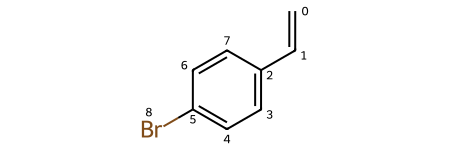

In [109]:
smi = 'C=Cc1ccc(cc1)Br'
mol = Chem.MolFromSmiles(smi)
mol

In [110]:
data_sub = data[data['SMILES']==smi]

data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']

color = data_sub['diff'].values
color1 = -color[1]
color2 = -color[2]
color3 = -color[3]
print(color1, color2, color3)

-26.776266201550584 28.893348551733766 -23.82389507498391


C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\870846688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']


In [111]:
atom_list = [2,3,4,5,6,7, 0,1, 8]
bond_list = [2,3,4,5,6,8, 0]


atom_attribution = [color1, color1, color1, color1, color1, color1, color2, color2, color3]
bond_attribution = [color1, color1, color1, color1, color1, color1, color2]
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(cc1)Br', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddyxT\xd5\xfd\xc7\xf1\xf7\x9d5\x99I\xd8A\x16\x11\x90]\x01\xd9\xb4\xa8 \x8b X\x01W\xd4\x1f(V\xa5Ej5QA\xc2"\x9b,\t\xa8\x04\xac n\xadHkAm\xab\x88\xa0"\xbb\xa8\xec\x8b\x02"\x88,\x82"K \xc9$\xb3\xdd\xfb\xfbc\x0c\x8d\x90\x84d\xe6\xce\x9d\xb9\xc9\xf7\xf5\xf4\xe9\x93L\xee\x9cs$\xc9\'\xe7\x9e{\x16E\xd34\x84\x10\xc2\x0c,\xb1n\x80\x10B\x94\x96\x04\x96\x10\xc24$\xb0\x84\x10\xa6!\x81%\x840\r\t,!\x84iH`\t!LC\x02K\x08a\x1a\x12XB\x08\xd3\x90\xc0\x12B\x98\x86\x04\x96\x10\xc24$\xb0\x84\x10\xa6!\x81%\x840\r\t,!\x84iH`\t!LC\x02K\x08a\x1a\x12XB\x08\xd3\x90\xc0\x12B\x98\x86\x04\x96\x10\xc24$\xb0\x84\x10\xa6!\x81%\x840\r\t,!\x84iH`\t!LC\x02K\x08a\x1a\x12XB\x08\xd3\x90\xc0\x12B\x98\x86\x04\x96\x10\xc24$\xb0\x84\x10\xa6!\x81%\x840\r[\xac\x1b \x84\x88/~?\x9b7\x07\xb6n\rl\xdf\x1e\xdc\xbf?x\xfa\xb4\xa6iX,T\xaf\xae4mjm\xdd\x

Polymer 4

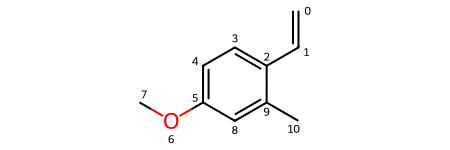

In [112]:
smi = 'C=Cc1ccc(OC)cc1C'
mol = Chem.MolFromSmiles(smi)
mol

In [113]:
data_sub = data[data['SMILES']==smi]

data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']

color = data_sub['diff'].values
color1 = -color[1]
color2 = -color[2]
color3 = -color[3]
print(color1, color2, color3)

-31.876172800737947 27.996493880109995 -5.511433589048579


C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\870846688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']


In [114]:
atom_list = [2,3,4,5,8,9, 0,1,  6,7]
bond_list = [2,3,4,7,8,10, 0, 6]


atom_attribution = [color1, color1, color1, color1, color1, color1, color2,color2, color3, color3]
bond_attribution = [color1, color1, color1, color1, color1, color1, color2, color3]
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(OC)cc1C', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddy\\TU\xff\x07\xf0\xcf\x9d\x8de\xd8QQD@A@\xcd\x15\xf7-\x17\xd2\x16\xb5\x9e\xa7\xb2R1K+}2\xc0\xa5\xb4L\xc5\xad\xdc\x05MS\xb3,\xa4_e\x96)\xf6\xd8\xa2\x8f\xb9\xa4"\x8a\x0b.\x80\xa2\x88l\xca\xbe\x0c\xcbl\xf7\xf7\xc7\x15B\x06\x90Y\xee0\x17\xbe\xef?|\xc1\xcc\xdcs.\xe0|\xe6\xdcs\xcf\xc2\xb0,\x0bB\x08\x11\x02QS\x9f\x00!\x844\x16\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08\x06\x05\x16!D0(\xb0\x08!\x82A\x81E\x08\x11\x0c\n,B\x88`P`\x11B\x04\x83\x02\x8b\x10"\x18\x14X\x84\x10\xc1\xa0\xc0"\x84\x08

Polymer 5

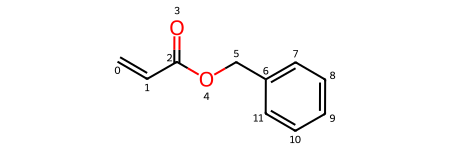

In [4]:
smi = 'C=CC(=O)OCc1ccccc1'
mol = Chem.MolFromSmiles(smi)
mol

In [10]:
data_sub = data[data['SMILES']==smi]

data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']

color = data_sub['diff'].values
color1 = -color[1]
color2 = -color[2]
color3 = -color[3]
color3 = color3 - 12
print(color1, color2, color3)

-19.11897032814545 7.230405505679414 15.009144429524156


C:\Users\Blue\AppData\Local\Temp\ipykernel_40556\1082254922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sub['diff'] = data_sub['tg'].iloc[0] - data_sub['tg']


In [11]:
for bond in mol.GetBonds():
    print(bond.GetIdx(), bond.GetBeginAtomIdx(), bond.GetEndAtomIdx())

0 0 1
1 1 2
2 2 3
3 2 4
4 4 5
5 5 6
6 6 7
7 7 8
8 8 9
9 9 10
10 10 11
11 11 6


In [12]:
atom_list = [6,7,8,9,10,11, 2,4,5,  0,1]
bond_list = [6,7,8,9,10,11, 3,4, 0]


atom_attribution = [color1, color1, color1, color1, color1, color1, color2,color2,color2, color3,color3]
bond_attribution = [color1, color1, color1, color1, color1, color1, color2,color2, color3]
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=CC(=O)OCc1ccccc1', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

C:\Users\Blue\AppData\Local\Temp\ipykernel_40556\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddw`SU\xdf\x07\xf0oV\xd3\xbd[\xda\x02\x1d@\x81\xb6t3d\x89\xec!\x82>\x80\x0fC\x10\x15}@\x91\x16\x04\x04Q\x01eHE[\x86\xa0\xe8\xc3F}\x18\xbeJ\x05A\x10\xc42\x842\xd2\x01\x1d@KK\xe9\xde+i\x9a\xe4\xbe\x7f\xdcRjG\x9a&i\x9bK\x7f\x9f\x7f\x08\xc9\xbd7\xa7\x81|{\xce\xb9\xbf{.\x8fa\x18\x10B\x08\x17\xf0\xdb\xbb\x01\x84\x10\xa2)\n,B\x08gP`\x11B8\x83\x02\x8b\x10\xc2\x19\x14X\x84\x10\xce\xa0\xc0"\x84p\x06\x05\x16!\x843(\xb0\x08!\x9cA\x81E\x08\xe1\x0c\n,B\x08gP`\x11B8\x83\x02\x8b\x10\xc2\x19\x14X\x84\x10\xce\xa0\xc0"\x84p\x06\x05\x16!\x843(\xb0\x08!\x9cA\x81E\x08\xe1\x0c\n,B\x08gP`\x11B8\x83\x02\x8b\x10\xc2\x19\x14X\x84\x10\xce\xa0\xc0"\x84p\x06\x05\x16!\x843(\xb0\x08!\x9cA\x81E\x08\xe1\x0c\n,B\x08gP`\x11B8\x83\x02\x8b\x10\xc2\x19\x14X\x84\x10\xce\xa0\xc0"\x84p\x06\x05\x16!\x843(\xb0\x08!\x9cA\x81E\x08\xe1\x0c\n,

Color Bar

C:\Users\Blue\AppData\Local\Temp\ipykernel_56276\4182464631.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


<Figure size 1800x1800 with 0 Axes>

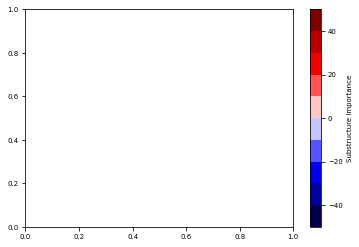

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# 增大图片尺寸和分辨率
plt.figure(figsize=(25, 25))

# 设置字体大小
plt.rcParams.update({'font.size': 7})

# 设置色图名称和颜色数量
cmap_name = 'seismic'
num_colors = 10

# 创建色图和归一化对象
cmap = cm.get_cmap(cmap_name, num_colors)
norm = colors.Normalize(vmin=-50, vmax=50)

# 创建ScalarMappable对象
plt_colors = cm.ScalarMappable(norm=norm, cmap=cmap)

# 绘制单独的colorbar
fig, ax = plt.subplots(1, 1)
fig.subplots_adjust(hspace=1)
cbar = plt.colorbar(plt_colors, ax=ax, orientation='vertical')

# 添加colorbar标签

# 设置字体大小
plt.rcParams.update({'font.size': 10})
cbar.set_label('Substructure Importance')


plt.savefig('../figures/mol_figure/colorbar.jpg', dpi=300)


plt.show()

三种卤素

In [116]:
smiF = 'C=Cc1ccc(cc1)F'
smiCl = 'C=Cc1ccc(cc1)Cl'
smiBr = 'C=Cc1ccc(cc1)Br'

dataF = data[data['SMILES']==smiF]
dataF['diff'] = dataF['tg'].iloc[0] - dataF['tg']

dataCl = data[data['SMILES']==smiCl]
dataCl['diff'] = dataCl['tg'].iloc[0] - dataCl['tg']

dataBr = data[data['SMILES']==smiBr]
dataBr['diff'] = dataBr['tg'].iloc[0] - dataBr['tg']

C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\3365502150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataF['diff'] = dataF['tg'].iloc[0] - dataF['tg']
C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\3365502150.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataCl['diff'] = dataCl['tg'].iloc[0] - dataCl['tg']
C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\3365502150.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [118]:
color = dataF['diff'].values
color1 = color[1]
color2 = color[2]
color3 = -color[3]
print(color1, color2, color3)

atom_list = [8]
bond_list = []


atom_attribution = [color3]
bond_attribution = []
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(cc1)F', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

color = dataCl['diff'].values
color1 = color[1]
color2 = color[2]
color3 = -color[3]
print(color1, color2, color3)

atom_list = [8]
bond_list = []


atom_attribution = [color3]
bond_attribution = []
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(cc1)Cl', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)



color = dataBr['diff'].values
color1 = color[1]
color2 = color[2]
color3 = -color[3]
print(color1, color2, color3)

atom_list = [8]
bond_list = []


atom_attribution = [color3]
bond_attribution = []
ring_attribution = []
ring_list = []

sub_attribution_visualize(smiles='C=Cc1ccc(cc1)Br', atom_attribution=atom_attribution, bond_attribution=bond_attribution, 
                          ring_attribution=ring_attribution, ring_list=ring_list, atom_list=atom_list, bond_list=bond_list)

25.97262351193791 -28.65706471792413 -12.564920254583342
25.976872887032698 -28.479542249190217 -12.675759821367535
26.776266201550584 -28.893348551733766 -23.82389507498391


C:\Users\Blue\AppData\Local\Temp\ipykernel_33436\1096763695.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap_name, num_colors)


b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01\x90\x08\x02\x00\x00\x00\x0f\xdd\xa1\x9b\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xed\xddy\\SW\xde?\xf0o\x16\x82\x84\x00\x02\x82\x88\x0b**n\xb8a]\xaa\xb8\xe2#*\xda\xda\x8a\xed\xd0\xc1\xa9\x1d\x07\xeb\xcf)ju\xc6\xdfT[\xda>\xedS\xec2C\x9d_\xc7\xd2\x99\xda\xd2\xe9\xe3T:\x8b\x83Ul\x11\xdcj]*X\xeb\x82\xfb\x02U\\\xd9\xd7l\xf7\xf9\xe3<\xe6\x17\xd9\x84\xe4$7\'|\xde/_\xbe\xc2\xe5\xe6\xe4$!\x9f\xdc{\xb6\xab\x90$\x89\x00\x00D\xa0\x94\xbb\x02\x00\x00m\x85\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x81\xc0\x02\x00a \xb0\x00@\x18\x08,\x00\x10\x06\x02\x0b\x00\x84\x8